In [1]:
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, LSTM, Dense, Conv1D, MaxPooling1D, Flatten, LeakyReLU, Input, Concatenate

In [2]:
TRAIN_SET = './ptb_train_set.pickle'
TEST_SET = './ptb_test_set.pickle'

with open(TEST_SET, 'rb') as file:
    test_set = pickle.load(file)
    x_test = test_set['x']
    y_test = test_set['y']

with open(TRAIN_SET, 'rb') as file:
    train_set = pickle.load(file)
    x_train = train_set['x']
    y_train = train_set['y']
    
x_train = tf.expand_dims(x_train, axis=2)
x_test = tf.expand_dims(x_test, axis=2)

In [3]:
print(x_train.shape)
print(y_train.shape)

(13097, 187, 1)
(13097,)


In [4]:
print(x_test.shape)
print(y_test.shape)

(1455, 187, 1)
(1455,)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LeakyReLU

model1 = Sequential()
model1.add(Conv1D(5, kernel_size=3, strides=1, input_shape=x_train.shape[1:]))
model1.add(LeakyReLU())
model1.add(MaxPooling1D(pool_size=2, strides=2))
model1.add(Conv1D(10, kernel_size=4, strides=1))
model1.add(LeakyReLU())
model1.add(MaxPooling1D(pool_size=2, strides=2))
model1.add(Conv1D(20, kernel_size=4, strides=1))
model1.add(LeakyReLU())
model1.add(MaxPooling1D(pool_size=2, strides=2))
model1.add(Flatten())
model1.add(Dense(30))
model1.add(LeakyReLU())
model1.add(Dense(20))
model1.add(LeakyReLU())
model1.add(Dense(1, activation="sigmoid"))
    
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 185, 5)            20        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 185, 5)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 92, 5)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 89, 10)            210       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 89, 10)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 44, 10)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 41, 20)            8

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LeakyReLU

model2 = Sequential()
model2.add(Conv1D(5, kernel_size=3, strides=1, input_shape=x_train.shape[1:]))
model2.add(LeakyReLU())
model2.add(MaxPooling1D(pool_size=2, strides=2))
model2.add(Conv1D(10, kernel_size=4, strides=1))
model2.add(LeakyReLU())
model2.add(MaxPooling1D(pool_size=2, strides=2))
model2.add(Conv1D(20, kernel_size=4, strides=1))
model2.add(LeakyReLU())
model2.add(MaxPooling1D(pool_size=2, strides=2))
model2.add(Flatten())
model2.add(Dense(30))
model2.add(LeakyReLU())
model2.add(Dense(20))
model2.add(LeakyReLU())
model2.add(Dense(1, activation="sigmoid"))
    
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 185, 5)            20        
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 185, 5)            0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 92, 5)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 89, 10)            210       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 89, 10)            0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 44, 10)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 41, 20)           

In [41]:
import tensorflow.keras as keras
opt = keras.optimizers.SGD(lr=0.003, momentum=0.7)
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model1.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [42]:
history1 = model1.fit(x_train, y_train,
              batch_size=128,
              epochs=20,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/20
103/103 [==============================] - 2s 12ms/step - loss: 0.5947 - accuracy: 0.7118 - val_loss: 0.4656 - val_accuracy: 0.7801
Epoch 2/20
103/103 [==============================] - 1s 10ms/step - loss: 0.4162 - accuracy: 0.8068 - val_loss: 0.3605 - val_accuracy: 0.8206
Epoch 3/20
103/103 [==============================] - 1s 11ms/step - loss: 0.3469 - accuracy: 0.8458 - val_loss: 0.3463 - val_accuracy: 0.8275
Epoch 4/20
103/103 [==============================] - 1s 10ms/step - loss: 0.2921 - accuracy: 0.8808 - val_loss: 0.2714 - val_accuracy: 0.8997
Epoch 5/20
103/103 [==============================] - 1s 10ms/step - loss: 0.2524 - accuracy: 0.9028 - val_loss: 0.2703 - val_accuracy: 0.8818
Epoch 6/20
103/103 [==============================] - 1s 10ms/step - loss: 0.2493 - accuracy: 0.9015 - val_loss: 0.2299 - val_accuracy: 0.9203
Epoch 7/20
103/103 [==============================] - 1s 9ms/step - loss: 0.2398 - accuracy: 0.9078 - val_loss: 0.2291 - val_accuracy: 0.9093


In [7]:
MLP_model = Sequential()
MLP_model.add(Dense(5, input_shape=x_train.shape[1:]))
MLP_model.add(Dense(64, activation='relu'))
MLP_model.add(Dense(128, activation='relu'))
MLP_model.add(Dense(128, activation='relu'))
MLP_model.add(Dense(128, activation='relu'))
MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(64, activation='relu'))
MLP_model.add(Flatten())
MLP_model.add(Dense(1, activation='sigmoid'))
MLP_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 187, 5)            10        
_________________________________________________________________
dense_7 (Dense)              (None, 187, 64)           384       
_________________________________________________________________
dense_8 (Dense)              (None, 187, 128)          8320      
_________________________________________________________________
dense_9 (Dense)              (None, 187, 128)          16512     
_________________________________________________________________
dense_10 (Dense)             (None, 187, 128)          16512     
_________________________________________________________________
dropout (Dropout)            (None, 187, 128)          0         
_________________________________________________________________
dense_11 (Dense)             (None, 187, 64)          

In [10]:
import tensorflow.keras as keras
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
MLP_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


In [12]:
MLP_history = MLP_model.fit(x_train, y_train,
              batch_size=64,
              epochs=20,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/20
205/205 [==============================] - 17s 74ms/step - loss: 0.5204 - accuracy: 0.7507 - val_loss: 0.4033 - val_accuracy: 0.8172
Epoch 2/20
205/205 [==============================] - 15s 74ms/step - loss: 0.3755 - accuracy: 0.8224 - val_loss: 0.3627 - val_accuracy: 0.8323
Epoch 3/20
205/205 [==============================] - 16s 79ms/step - loss: 0.3459 - accuracy: 0.8387 - val_loss: 0.3554 - val_accuracy: 0.8302
Epoch 4/20
205/205 [==============================] - 16s 76ms/step - loss: 0.3308 - accuracy: 0.8520 - val_loss: 0.3105 - val_accuracy: 0.8660
Epoch 5/20
205/205 [==============================] - 16s 77ms/step - loss: 0.3140 - accuracy: 0.8614 - val_loss: 0.3021 - val_accuracy: 0.8701
Epoch 6/20
205/205 [==============================] - 16s 79ms/step - loss: 0.2893 - accuracy: 0.8793 - val_loss: 0.2830 - val_accuracy: 0.8735
Epoch 7/20
205/205 [==============================] - 16s 77ms/step - loss: 0.2700 - accuracy: 0.8841 - val_loss: 0.2819 - val_accuracy:

KeyboardInterrupt: 

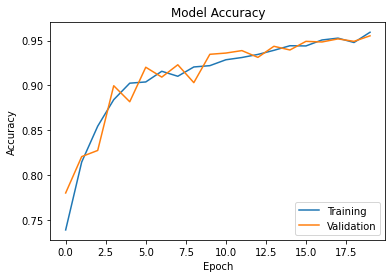

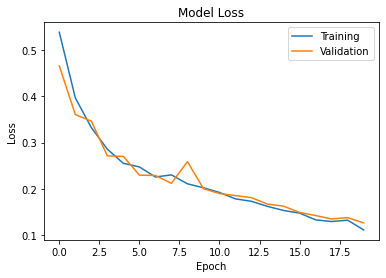

In [44]:
fig1, ax_acc = plt.subplots()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['Training', 'Validation'], loc='upper right')


plt.show()
    


In [46]:
model1.save("CNN_PTB")

INFO:tensorflow:Assets written to: CNN_PTB\assets
